<a href="https://colab.research.google.com/github/ph2017001/MachineLearning_Wkshp/blob/master/k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets


In [ ]:
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Visualize in 3D how the actual points/what the ground truth is:

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.labels_

In [ ]:
labels.astype(np.float)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2.,
       0., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 0.])

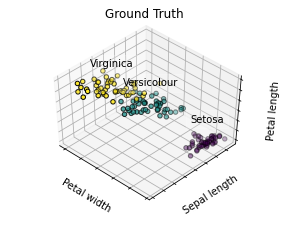

In [ ]:
# Plot the ground truth
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [0,1,2]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


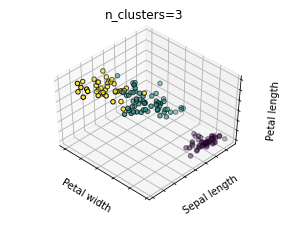

In [ ]:
fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
model.fit(X)
labels = model.labels_
print(labels.astype(np.float))
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
            c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('n_clusters=3')
ax.dist = 12

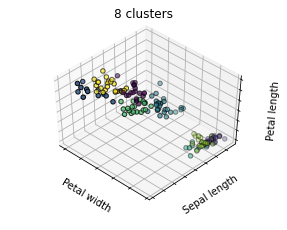

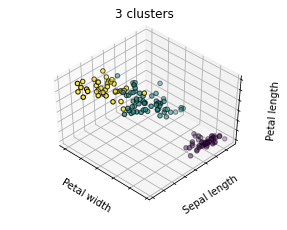

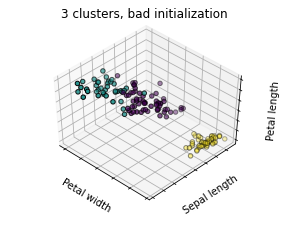

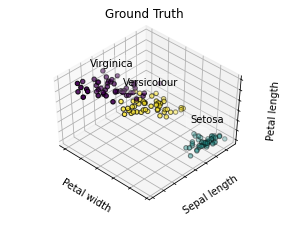

In [ ]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

### You can also make your own dataset for experimenting using the "make_blobs" function in sklearn


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, 
                  cluster_std=1.6, random_state=50)

In [ ]:
# create np array for data points
points = data[0]

In [ ]:
data[1]

array([2, 0, 3, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 3, 2, 1, 3, 3,
       0, 0, 2, 3, 3, 2, 0, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0, 0, 2, 0, 0, 2,
       0, 3, 2, 2, 0, 1, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 3, 3, 1, 0, 3, 0, 3, 1, 0, 3, 2, 3, 0, 3, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 1, 0,
       0, 3, 2, 3, 0, 2, 2, 1, 2, 3, 2, 1, 1, 2, 0, 3, 0, 1, 2, 1, 3, 0,
       0, 3, 2, 0, 0, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 0, 1, 3, 0, 2,
       1, 0, 2, 3, 0, 3, 3, 2, 1, 0, 1, 2, 3, 0, 3, 3, 1, 3, 0, 2, 1, 3,
       1, 2])

(-15.0, 15.0)

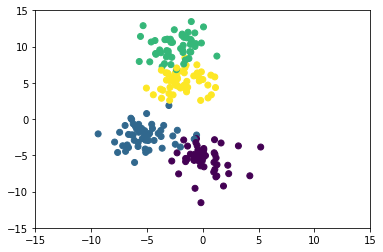

In [ ]:
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [ ]:
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[-1.92101646  5.21673484]
 [ 0.05161133 -5.35489826]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]]


(-15.0, 15.0)

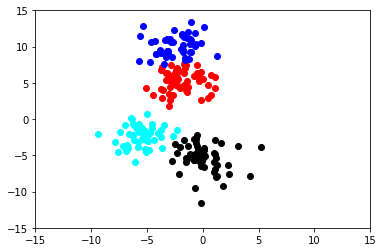

In [ ]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1],  c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1],  c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1],  c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [ ]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

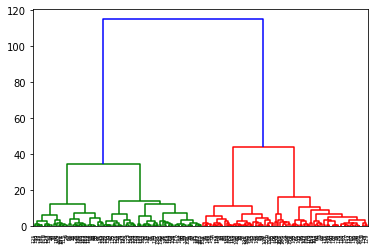

In [ ]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', 
                             linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)

(-15.0, 15.0)

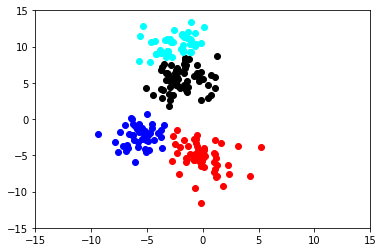

In [ ]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1],  c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1],  c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1],  c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)